In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [7]:
df = pd.read_csv("../data/raw/MagicBricks.csv")

df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
df.describe(include="all")

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1254,1259,1226.000000,1.259000e+03,1259,1259,1254,1018.000000
unique,NaN,NaN,NaN,3,365,NaN,NaN,2,2,2,NaN
top,NaN,NaN,NaN,Semi-Furnished,Lajpat Nagar 3,NaN,NaN,Ready_to_move,Resale,Builder_Floor,NaN
freq,NaN,NaN,NaN,708,34,NaN,NaN,1184,781,661,NaN
mean,1466.452724,2.796664,2.556086,NaN,NaN,1.935563,2.130670e+07,NaN,NaN,NaN,15690.136542
std,1568.055040,0.954425,1.042220,NaN,NaN,6.279212,2.560115e+07,NaN,NaN,NaN,21134.738568
min,28.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000e+06,NaN,NaN,NaN,1259.000000
25%,800.000000,2.000000,2.000000,NaN,NaN,1.000000,5.700000e+06,NaN,NaN,NaN,6364.000000
50%,1200.000000,3.000000,2.000000,NaN,NaN,1.000000,1.420000e+07,NaN,NaN,NaN,11291.500000
75%,1700.000000,3.000000,3.000000,NaN,NaN,2.000000,2.550000e+07,NaN,NaN,NaN,18000.000000


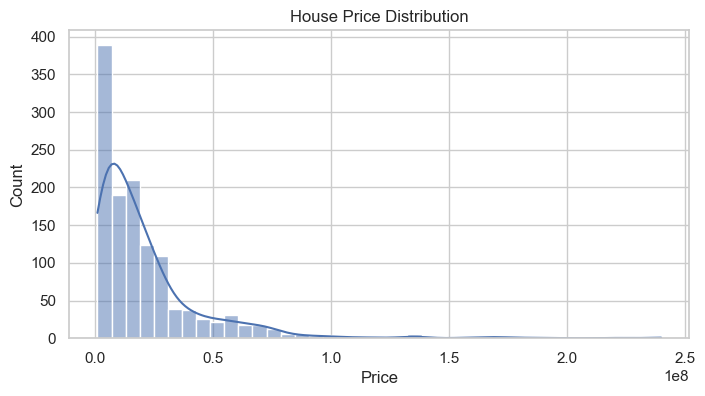

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df["Price"], bins=40, kde=True)
plt.title("House Price Distribution")
plt.show()

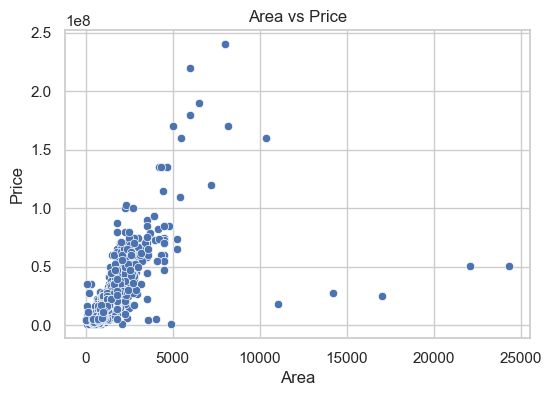

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Area", y="Price", data=df)
plt.title("Area vs Price")
plt.show()

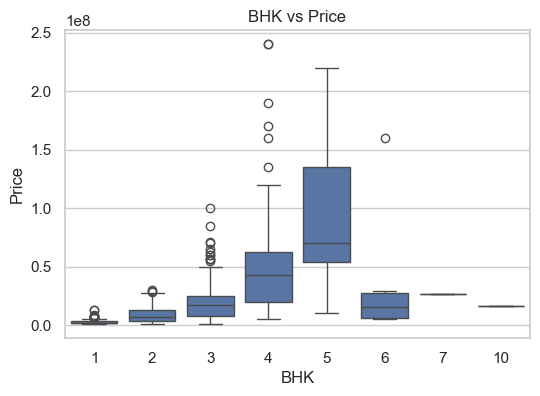

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x="BHK", y="Price", data=df)
plt.title("BHK vs Price")
plt.show()

In [12]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [16]:
num_cols = ["Bathroom", "Parking"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = ["Furnishing", "Type"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
dtype: int64

In [19]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [22]:
X_train.shape, X_test.shape

((1007, 373), (252, 373))

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 18678529.961074512


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [27]:
y_pred_rf = rf.predict(X_test)

In [28]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 12318584.425838728


In [29]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

Area                                          0.701388
Bathroom                                      0.102718
Parking                                       0.023973
Transaction_Resale                            0.019777
Locality_Lajpat Nagar                         0.015084
BHK                                           0.014822
Locality_Maharani Bagh, New Friends Colony    0.008332
Locality_Hauz Khas Enclave, Hauz Khas         0.007539
Type_Builder_Floor                            0.005902
Locality_Punjabi Bagh West                    0.005877
dtype: float64